In [1]:
import numpy as np
import pandas as pd

In [2]:
# First I will take the merged dataset and import it into the notebook

dfmerged =  pd.read_csv("Data/ProjectDataStage1WIDEFORMAT.csv")
dfmerged.head(50)

,Unnamed: 0,countyFIPS,County Name,State,population,2020-01-22_Cases,2020-01-23_Cases,2020-01-24_Cases,2020-01-25_Cases,2020-01-26_Cases,...,2023-07-14_Deaths,2023-07-15_Deaths,2023-07-16_Deaths,2023-07-17_Deaths,2023-07-18_Deaths,2023-07-19_Deaths,2023-07-20_Deaths,2023-07-21_Deaths,2023-07-22_Deaths,2023-07-23_Deaths
0,0,0,Statewide Unallocated,AL,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1001,Autauga County,AL,55869,0,0,0,0,0,...,235,235,235,235,235,235,235,235,235,235
2,2,1003,Baldwin County,AL,223234,0,0,0,0,0,...,731,731,731,731,731,731,731,731,731,731
3,3,1005,Barbour County,AL,24686,0,0,0,0,0,...,104,104,104,104,104,104,104,104,104,104
4,4,1007,Bibb County,AL,22394,0,0,0,0,0,...,111,111,111,111,111,111,111,111,111,111
5,5,1009,Blount County,AL,57826,0,0,0,0,0,...,261,261,261,261,261,261,261,261,261,261
6,6,1011,Bullock County,AL,10101,0,0,0,0,0,...,54,54,54,54,54,54,54,54,54,54
7,7,1013,Butler County,AL,19448,0,0,0,0,0,...,132,132,132,132,132,132,132,132,132,132
8,8,1015,Calhoun County,AL,113605,0,0,0,0,0,...,683,683,683,683,683,683,683,683,683,683
9,9,1017,Chambers County,AL,33254,0,0,0,0,0,...,172,172,172,172,172,172,172,172,172,172


Now I create a new dataset that contains only rows with the state value "FL." This will allow me to have a dataset that consists of only relevant data.

In [3]:
fldata = dfmerged[dfmerged['State'] == 'FL']
print(fldata.shape)

(68, 2535)


This new database contains 68 rows, 1 for the unallocated cases, and 67 for each of the counties in Florida.

# Part 1: Calculate COVID-19 data trends for last week of the data. Are the cases increasing, decreasing, or stable? Each student chooses a state to analyze.

### I'll start with case data. I want to create a separate array that contains all the case data so we can run calculations on it.

In [4]:
# Filter the DataFrame to select only the relevant confirmed case data
case_columns = [col for col in fldata.columns if col.startswith('20') and 'Cases' in col]
case_df = fldata[case_columns]


case_array = case_df.values


print(case_array)

[[    0     0     0 ... 90634 90634 90634]
 [    0     0     0 ... 10787 10787 10787]
 [    0     0     0 ... 55836 55836 55836]
 ...
 [    0     0     0 ... 19888 19888 19888]
 [    0     0     0 ...  7731  7731  7731]
 [    0     0     0 ... 86623 86623 86623]]


### Now we plot the data.

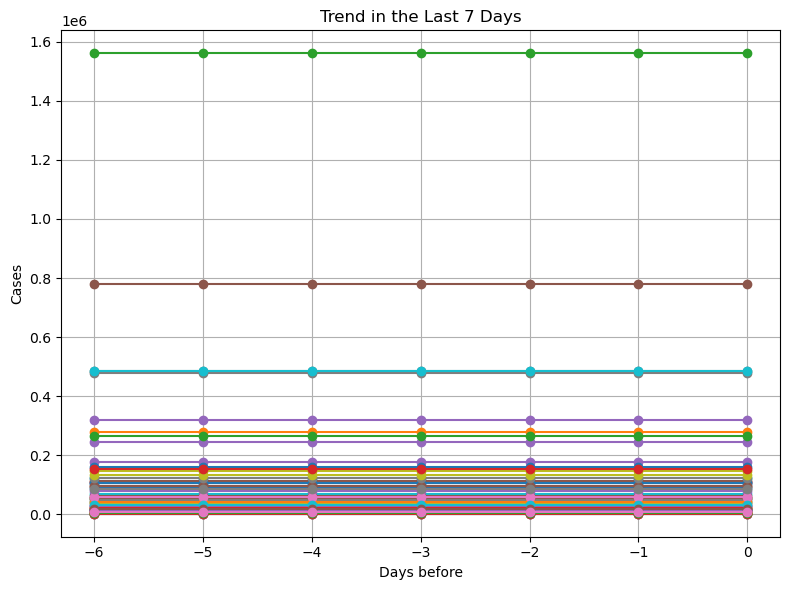

In [5]:
# We will use this library to plot our data
import matplotlib.pyplot as plt


# Select the last 7 elements (most recent) from each row
recent_data = case_array[:, -7:]

# Create an array of x-values (e.g., labels for the last 7 days)
x_labels = np.arange(-6, 1)

# Create a line chart for each row in "case_array"
plt.figure(figsize=(8, 6))

# Iterate through the rows and plot each row as a line
for data_row in recent_data:
    plt.plot(x_labels, data_row, linestyle='-', marker='o')

plt.xlabel('Days before')
plt.ylabel('Cases')
plt.title('Trend in the Last 7 Days')



# Display the chart
plt.tight_layout()
plt.grid(True)
plt.show()

### A very boring chart of little practical use. It looks perfectly flat, but we can run some calculations to verify this.

In [6]:
# Create an empty list to store the differences between values in the interval
differences = []

# Iterate through the rows of "case_array"
for row in case_array:
    # Calculate the difference between the 7th-to-last and last elements
    diff = row[-7] - row[-1]
    differences.append(diff)

# Convert the list of differences to a NumPy array
differences_array = np.array(differences)

# Now, "differences_array" contains the differences for each row

for county_name, diff in zip(fldata['County Name'], differences_array):
    print(f'County Name: {county_name}, Difference: {diff}')

County Name: Statewide Unallocated, Difference: 0
County Name: Alachua County, Difference: 0
County Name: Baker County, Difference: 0
County Name: Bay County, Difference: 0
County Name: Bradford County, Difference: 0
County Name: Brevard County, Difference: 0
County Name: Broward County, Difference: 0
County Name: Calhoun County, Difference: 0
County Name: Charlotte County, Difference: 0
County Name: Citrus County, Difference: 0
County Name: Clay County, Difference: 0
County Name: Collier County, Difference: 0
County Name: Columbia County, Difference: 0
County Name: DeSoto County, Difference: 0
County Name: Dixie County, Difference: 0
County Name: Duval County, Difference: 0
County Name: Escambia County, Difference: 0
County Name: Flagler County, Difference: 0
County Name: Franklin County, Difference: 0
County Name: Gadsden County, Difference: 0
County Name: Gilchrist County, Difference: 0
County Name: Glades County, Difference: 0
County Name: Gulf County, Difference: 0
County Name: Ha

### We probably could have seen this coming from how the chart was flatter than Kansas. We'll conclude that the cases in every county in Florida is stable within the last week. We can now do the same thing, but with the deaths dataset.

In [7]:
# Filter the DataFrame to select only the relevant confirmed deaths data
deaths_columns = [col for col in fldata.columns if col.startswith('20') and 'Deaths' in col]
deaths_df = fldata[deaths_columns]


deaths_array = deaths_df.values


print(deaths_array)

[[   0    0    0 ...  285  285  285]
 [   0    0    0 ...   62   62   62]
 [   0    0    0 ...  394  394  394]
 ...
 [   0    0    0 ...   89   89   89]
 [   0    0    0 ...   52   52   52]
 [   0    0    0 ... 1665 1665 1665]]


### Plot the data.

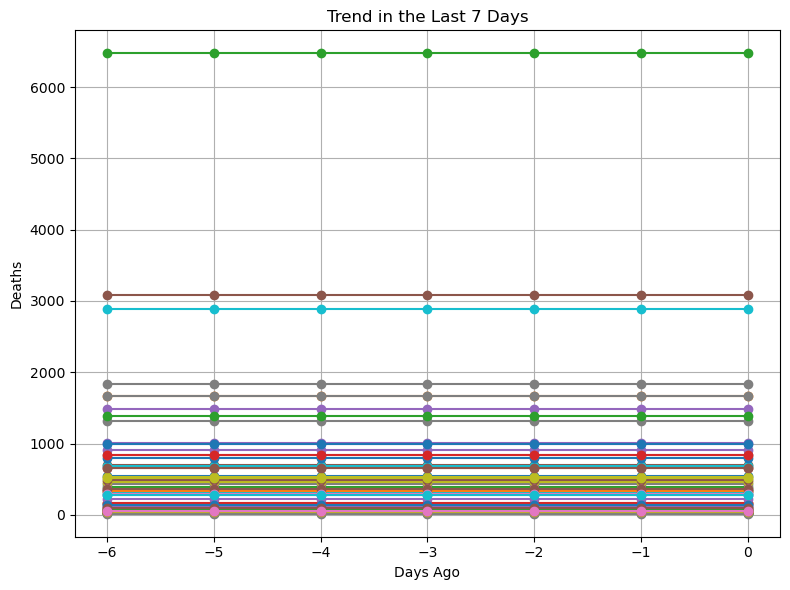

In [8]:
# Select the last 7 elements (most recent) from each row
recent_data = deaths_array[:, -7:]

# Create an array of x-values 
x_labels = np.arange(-6, 1)

# Create a line chart for each row in "case_array"
plt.figure(figsize=(8, 6))

# Iterate through the rows and plot each row as a line
for data_row in recent_data:
    plt.plot(x_labels, data_row, linestyle='-', marker='o')

    
plt.xlabel('Days Ago')
plt.ylabel('Deaths')
plt.title('Trend in the Last 7 Days')

# Display the chart
plt.tight_layout()
plt.grid(True)
plt.show()

### Looking very stable, just like the cases data. Just to be safe we can calculate the differences again.

In [9]:
for row in deaths_array:
    diff = row[-7] - row[-1]
    differences.append(diff)
    
differences_array = np.array(differences)

for county_name, diff in zip(fldata['County Name'], differences_array):
    print(f'County Name: {county_name}, Difference: {diff}')

County Name: Statewide Unallocated, Difference: 0
County Name: Alachua County, Difference: 0
County Name: Baker County, Difference: 0
County Name: Bay County, Difference: 0
County Name: Bradford County, Difference: 0
County Name: Brevard County, Difference: 0
County Name: Broward County, Difference: 0
County Name: Calhoun County, Difference: 0
County Name: Charlotte County, Difference: 0
County Name: Citrus County, Difference: 0
County Name: Clay County, Difference: 0
County Name: Collier County, Difference: 0
County Name: Columbia County, Difference: 0
County Name: DeSoto County, Difference: 0
County Name: Dixie County, Difference: 0
County Name: Duval County, Difference: 0
County Name: Escambia County, Difference: 0
County Name: Flagler County, Difference: 0
County Name: Franklin County, Difference: 0
County Name: Gadsden County, Difference: 0
County Name: Gilchrist County, Difference: 0
County Name: Glades County, Difference: 0
County Name: Gulf County, Difference: 0
County Name: Ha

### There has been no change in the deaths in any county in Florida either.

## I am comfortable with concluding that both the cases and deaths in Florida are stable in the last week of the data.

# Part 2: Each student member creates notebooks to read the Enrichment data and displays them on a notebook.

### My enrichment dataset contains two different .csv files, one for data on the continental US, and one for Puerto Rico and the Virgin Islands.

In [10]:
# Reading the enrichment dataset with data on continental US

dfemploy =  pd.read_csv("Data\EmploymentDatasetCtntl.csv")
dfemploy.head()

C:\Users\Billy\AppData\Local\Temp\ipykernel_13480\1518944530.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  dfemploy =  pd.read_csv("Data\EmploymentDatasetCtntl.csv")


,Area_Code,St,Cnty,Own,NAICS,Year,Qtr,Area Type,St Name,Area,...,Industry,Status Code,Establishment Count,January Employment,February Employment,March Employment,Total Quarterly Wages,Average Weekly Wage,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
0,US000,US,0.0,0,10,2023,1,Nation,NaN,U.S. TOTAL,...,"10 Total, all industries",NaN,"11,883,196","150,176,434","150,957,408","151,418,052","2,873,835,484,925","1,465",1.0,1.0
1,US000,US,0.0,1,10,2023,1,Nation,NaN,U.S. TOTAL,...,"10 Total, all industries",NaN,"60,862","2,864,978","2,878,828","2,883,282","69,903,511,841","1,870",1.0,1.0
2,US000,US,0.0,2,10,2023,1,Nation,NaN,U.S. TOTAL,...,"10 Total, all industries",NaN,"71,582","4,524,712","4,616,278","4,635,444","87,116,336,812","1,459",1.0,1.0
3,US000,US,0.0,3,10,2023,1,Nation,NaN,U.S. TOTAL,...,"10 Total, all industries",NaN,"171,871","14,247,053","14,368,698","14,432,079","222,765,651,053","1,194",1.0,1.0
4,US000,US,0.0,5,10,2023,1,Nation,NaN,U.S. TOTAL,...,"10 Total, all industries",NaN,"11,578,881","128,539,691","129,093,604","129,467,247","2,494,049,985,219","1,487",1.0,1.0


In [11]:
# Reading the enrichment dataset with data on Puerto Rico and Virgin Islands

dfemploy_prvi =  pd.read_csv("Data\EmploymentDatasetPRVI.csv")
dfemploy_prvi.head()

,Area\nCode,St,Cnty,Own,NAICS,Year,Qtr,Area Type,St Name,Area,...,Industry,Status Code,Establishment Count,January Employment,February Employment,March Employment,Total Quarterly Wages,Average Weekly Wage,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
0,US000,US,0.0,0,10,2023,1,Nation,NaN,U.S. TOTAL,...,"10 Total, all industries",NaN,"11,883,196","150,176,434","150,957,408","151,418,052","2,873,835,484,925","1,465",1.0,1.0
1,US000,US,0.0,1,10,2023,1,Nation,NaN,U.S. TOTAL,...,"10 Total, all industries",NaN,"60,862","2,864,978","2,878,828","2,883,282","69,903,511,841","1,870",1.0,1.0
2,US000,US,0.0,2,10,2023,1,Nation,NaN,U.S. TOTAL,...,"10 Total, all industries",NaN,"71,582","4,524,712","4,616,278","4,635,444","87,116,336,812","1,459",1.0,1.0
3,US000,US,0.0,3,10,2023,1,Nation,NaN,U.S. TOTAL,...,"10 Total, all industries",NaN,"171,871","14,247,053","14,368,698","14,432,079","222,765,651,053","1,194",1.0,1.0
4,US000,US,0.0,5,10,2023,1,Nation,NaN,U.S. TOTAL,...,"10 Total, all industries",NaN,"11,578,881","128,539,691","129,093,604","129,467,247","2,494,049,985,219","1,487",1.0,1.0


# Part 3: Each student member performs initial merges with the COVID-19 data using the variables in the Enrichment data.

### Since our COVID database does not include data on Puerto Rico or Virgin Islands, there is no need to merge that dataset. I will concern myself with merging the dataset on the continental US.

In [12]:
# countyFIPS and Cnty have the same value to represent their county, a unique county ID number.
# I can rename Cnty to countyFIPS to make the merge possible.

dfemploy['countyFIPS'] = dfemploy['Cnty']

dfemploy.drop(columns=['Cnty'], inplace=True)

# Drops all rows where Ownership is not Equal to Total Covered, because our initial dataset doesn't distinguish between
# these factors and they would needlessly bloat it.

dfemploy = dfemploy[dfemploy['Ownership'] == 'Total Covered']

# Drop the 'Ownership' column
dfemploy.drop(columns=['Ownership'], inplace=True)

#np.savetxt("dfemploy.csv", dfemploy)
dfemploy.to_csv('Data\dfemploy.csv')
common = 'countyFIPS'

merged_df = dfmerged.merge(dfemploy, on=common, how="inner")

merged_df.head(500)

,Unnamed: 0,countyFIPS,County Name,State,population,2020-01-22_Cases,2020-01-23_Cases,2020-01-24_Cases,2020-01-25_Cases,2020-01-26_Cases,...,Industry,Status Code,Establishment Count,January Employment,February Employment,March Employment,Total Quarterly Wages,Average Weekly Wage,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
0,0,0,Statewide Unallocated,AL,0,0,0,0,0,0,...,"10 Total, all industries",NaN,"11,883,196","150,176,434","150,957,408","151,418,052","2,873,835,484,925","1,465",1.0,1.0
1,0,0,Statewide Unallocated,AL,0,0,0,0,0,0,...,"10 Total, all industries",NaN,"153,829","2,036,777","2,052,692","2,055,344","31,006,649,367","1,164",1.0,1.0
2,0,0,Statewide Unallocated,AL,0,0,0,0,0,0,...,"10 Total, all industries",NaN,"25,095","302,983","309,685","311,251","5,207,811,953","1,301",1.0,1.0
3,0,0,Statewide Unallocated,AL,0,0,0,0,0,0,...,"10 Total, all industries",NaN,"214,669","3,118,239","3,143,856","3,143,089","54,208,842,631","1,330",1.0,1.0
4,0,0,Statewide Unallocated,AL,0,0,0,0,0,0,...,"10 Total, all industries",NaN,"102,191","1,259,940","1,265,609","1,272,529","18,549,091,873","1,127",1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,398,0,Statewide Unallocated,GA,0,0,0,0,0,0,...,"10 Total, all industries",NaN,"64,267","493,362","495,761","498,138","6,951,740,566","1,079",1.0,1.0
496,398,0,Statewide Unallocated,GA,0,0,0,0,0,0,...,"10 Total, all industries",NaN,"75,896","980,663","985,309","990,747","14,932,445,112","1,165",1.0,1.0
497,398,0,Statewide Unallocated,GA,0,0,0,0,0,0,...,"10 Total, all industries",NaN,"106,294","1,484,625","1,492,186","1,497,245","24,154,073,096","1,246",1.0,1.0
498,398,0,Statewide Unallocated,GA,0,0,0,0,0,0,...,"10 Total, all industries",NaN,"64,168","670,900","670,713","671,902","12,759,039,594","1,462",1.0,1.0


In [13]:
merged_df.to_csv('Data\initial_merge_with_employment.csv')